In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('I:/WAF with mechine learning/Dataset/SQL and XSS/finalSqldataset.csv')

In [4]:
data

,Unnamed: 0,Class,Method,host,cookie,Accept,content_length,content,classification,URL,...,count_embed_domain_content,count%_content,count?_content,count-_content,count=_content,sus_content,count_digits_content,count_letters_content,special_count_content,is_encoded_content
0,0,0,GET,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,0.0,0,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,GET,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,0.0,0,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...,...,0,0,0,0,0,0,0,0,0,0
2,2,0,POST,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,0.0,68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...,...,0,1,0,0,5,75,8,47,13,1
3,3,0,GET,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,0.0,0,NaN,0,http://localhost:8080/tienda1/publico/autentic...,...,0,0,0,0,0,0,0,0,0,0
4,4,0,POST,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,0.0,63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...,...,0,1,0,0,5,30,4,49,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61060,61060,1,GET,localhost:8080,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,0.0,0,NaN,1,http://localhost:8080/tienda1/miembros/editar....,...,0,0,0,0,0,0,0,0,0,0
61061,61061,1,POST,localhost:8080,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,0.0,255,modo=registro&login=beaumont&password=quEratIt...,1,http://localhost:8080/tienda1/miembros/editar....,...,0,6,0,0,13,70,40,178,37,1
61062,61062,1,GET,localhost:8080,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,0.0,0,NaN,1,http://localhost:8080/tienda1/miembros/editar....,...,0,0,0,0,0,0,0,0,0,0
61063,61063,1,GET,localhost:8080,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,0.0,0,NaN,1,http://localhost:8080/tienda1/imagenes/3.gif/ ...,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(61065, 44)

In [6]:
data.columns

Index(['Unnamed: 0', 'Class', 'Method', 'host', 'cookie', 'Accept',
       'content_length', 'content', 'classification', 'URL', 'count_dot_url',
       'count_dir_url', 'count_embed_domain_url', 'short_url', 'count-http',
       'count%_url', 'count?_url', 'count-_url', 'count=_url',
       'hostname_length_url', 'sus_url', 'count-digits_url',
       'count-letters_url', 'url_length', 'number_of_parameters_url',
       'number_of_fragments_url', 'is_encoded_url', 'special_count_url',
       'unusual_character_ratio_url', 'Method_enc', 'host_enc', 'Accept_enc',
       'count_dot_content', 'count_dir_content', 'count_embed_domain_content',
       'count%_content', 'count?_content', 'count-_content', 'count=_content',
       'sus_content', 'count_digits_content', 'count_letters_content',
       'special_count_content', 'is_encoded_content'],
      dtype='object')

In [7]:
y=data['classification']
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
61060    1
61061    1
61062    1
61063    1
61064    1
Name: classification, Length: 61065, dtype: int64


In [8]:
data['classification'].to_csv('I:/WAF with mechine learning/Dataset/SQL and XSS/finalSqldatasetlabel.csv')

In [41]:
y.tail()

61060    1
61061    1
61062    1
61063    1
61064    1
Name: classification, dtype: int64

In [9]:
labels=['count_dot_url', 'count_dir_url', 'count_embed_domain_url', 'count-http',
                'count%_url', 'count?_url', 'count-_url', 'count=_url', 'url_length', 'hostname_length_url',
                'sus_url', 'count-digits_url', 'count-letters_url', 'number_of_parameters_url',
                'is_encoded_url','special_count_url','unusual_character_ratio_url',
                'Method_enc',
                'count_dot_content','count%_content',
                 'count-_content','count=_content','sus_content','count_digits_content',
                  'count_letters_content','content_length',
               'is_encoded_content','special_count_content', ]
print(data[labels])

       count_dot_url  count_dir_url  count_embed_domain_url  count-http  \
0                  2              3                       0           1   
1                  2              3                       0           1   
2                  2              4                       0           1   
3                  2              3                       0           1   
4                  2              4                       0           1   
...              ...            ...                     ...         ...   
61060              3              3                       0           1   
61061              2              4                       0           1   
61062              3              4                       0           1   
61063              2              5                       0           1   
61064              3              4                       0           1   

       count%_url  count?_url  count-_url  count=_url  url_length  \
0               0           0 

In [10]:
data[labels].shape

(61065, 28)

In [11]:
data[labels].to_csv('I:/WAF with mechine learning/Dataset/SQL and XSS/testdataset.csv')

In [12]:
data[labels]

,count_dot_url,count_dir_url,count_embed_domain_url,count-http,count%_url,count?_url,count-_url,count=_url,url_length,hostname_length_url,...,count_dot_content,count%_content,count-_content,count=_content,sus_content,count_digits_content,count_letters_content,content_length,is_encoded_content,special_count_content
0,2,3,0,1,0,0,0,0,48,14,...,0,0,0,0,0,0,0,0,0,0
1,2,3,0,1,1,1,0,5,126,14,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,1,0,0,0,0,57,14,...,0,1,0,5,75,8,47,68,1,13
3,2,3,0,1,1,1,0,5,125,14,...,0,0,0,0,0,0,0,0,0,0
4,2,4,0,1,0,0,0,0,61,14,...,0,1,0,5,30,4,49,63,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61060,3,3,0,1,6,1,0,13,314,14,...,0,0,0,0,0,0,0,0,0,0
61061,2,4,0,1,0,0,0,0,58,14,...,1,6,0,13,70,40,178,255,1,37
61062,3,4,0,1,0,0,0,0,62,14,...,0,0,0,0,0,0,0,0,0,0
61063,2,5,0,1,0,0,0,0,54,14,...,0,0,0,0,0,0,0,0,0,0


In [13]:
print('computing...)')
#split dataset in test and train 
x_tr, x_ts, y_tr, y_ts = train_test_split(data[labels], y, test_size=0.2, random_state=42)
print('Done!')

computing...)
Done!


i:\WAF with mechine learning\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7408 - loss: 0.5119 - val_accuracy: 0.8101 - val_loss: 0.3740
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8101 - loss: 0.3726 - val_accuracy: 0.8121 - val_loss: 0.3537
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8182 - loss: 0.3519 - val_accuracy: 0.8258 - val_loss: 0.3404
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8264 - loss: 0.3365 - val_accuracy: 0.8261 - val_loss: 0.3304
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8315 - loss: 0.3247 - val_accuracy: 0.8434 - val_loss: 0.3155
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8353 - loss: 0.3157 - val_accuracy: 0.8340 - val_loss: 0.3049
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8416 - loss: 0.3014 - val_accuracy: 0.8433 - val_loss: 0.2943
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8502 - loss: 0.2899 - val_accu

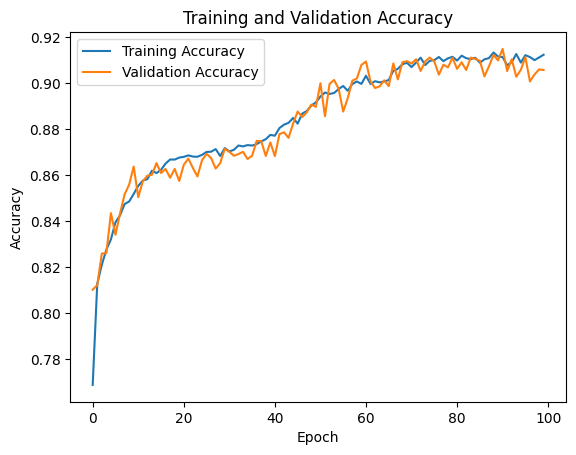

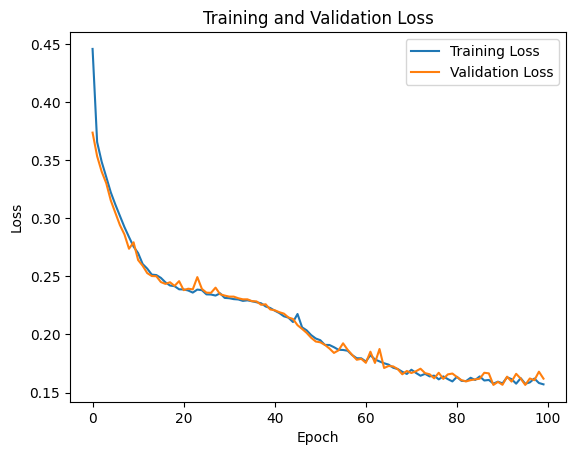

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9080 - loss: 0.1598
Test Accuracy: 0.9057561755180359
Test Loss: 0.1619405895471573


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to create CNN model
def create_cnn_model(input_shape, num_filters=64, kernel_size=3, pool_size=2, dense_units=128, dropout_rate=0.5):
    model = Sequential()
    model.add(Conv1D(num_filters, kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size))
    model.add(Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Prepare data
# Assuming you already have x_tr, x_ts, y_tr, and y_ts from your previous code

# Reshape input data to fit CNN input shape
x_tr_cnn = x_tr.values.reshape(x_tr.shape[0], len(labels), 1)
x_ts_cnn = x_ts.values.reshape(x_ts.shape[0], len(labels), 1)

# Scale input features
scaler = StandardScaler()
x_tr_scaled = scaler.fit_transform(x_tr_cnn.reshape(x_tr_cnn.shape[0], -1)).reshape(x_tr_cnn.shape)
x_ts_scaled = scaler.transform(x_ts_cnn.reshape(x_ts_cnn.shape[0], -1)).reshape(x_ts_cnn.shape)

# Create and compile the model
model = create_cnn_model(input_shape=(len(labels), 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_tr_scaled, y_tr, epochs=100, batch_size=256, validation_data=(x_ts_scaled, y_ts))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(x_ts_scaled, y_ts)
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')


382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


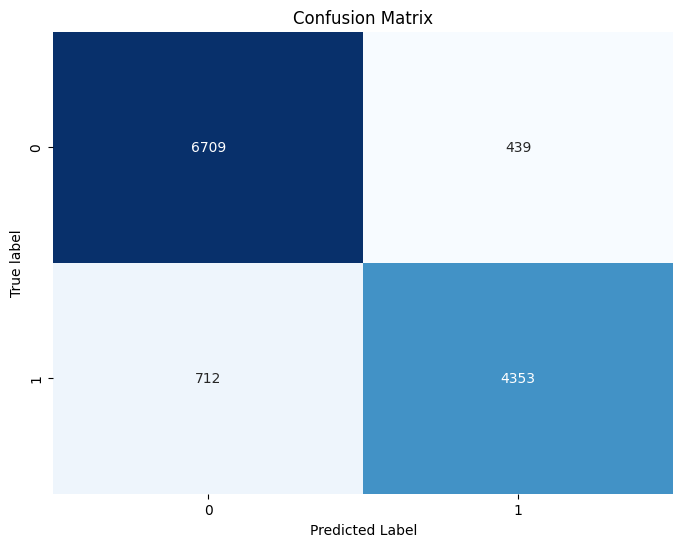

In [15]:
#import numpy as np
from sklearn.metrics import confusion_matrix

# Predict classes for test set
y_pred_probs = model.predict(x_ts_scaled)
y_pred_binary = (y_pred_probs>0.5).astype(int)

# Convert predictions and true labels to binary arrays
y_pred_binary = np.squeeze(y_pred_binary)
y_true_binary = np.squeeze(y_ts)

# Generate confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)
print(f'Precision: {precision}')
print(f'Recall: {recall}')  
print(f'F1 Score: {f1}')


Precision: 0.9083889816360601
Recall: 0.8594274432379072
F1 Score: 0.8832301917419093


In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_true_binary, y_pred_binary))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7148
           1       0.91      0.86      0.88      5065

    accuracy                           0.91     12213
   macro avg       0.91      0.90      0.90     12213
weighted avg       0.91      0.91      0.91     12213



In [18]:
model.save('CNN_model_for_XSS_and_SQL_injection.h5')

In [19]:
import joblib
import numpy as np

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib
import pandas as pd

# Load the trained model
model = load_model('I:/WAF with mechine learning/SQL and XSS/CNN_model_for_XSS_and_SQL_injection.h5')

# Load the scaler
scaler = joblib.load('I:/WAF with mechine learning/SQL and XSS/scaler.pkl')

# Define labels
labels=['count_dot_url', 'count_dir_url', 'count_embed_domain_url', 'count-http',
        'count%_url', 'count?_url', 'count-_url', 'count=_url', 'url_length', 'hostname_length_url',
        'sus_url', 'count-digits_url', 'count-letters_url', 'number_of_parameters_url',
        'is_encoded_url','special_count_url','unusual_character_ratio_url',
        'Method_enc',
        'count_dot_content','count%_content',
        'count-_content','count=_content','sus_content','count_digits_content',
        'count_letters_content','content_length',
        'is_encoded_content','special_count_content']

# Function to make predictions
def predict_with_loaded_model(csv_filename):
    # Load CSV file into a DataFrame
    new_data = pd.read_csv(csv_filename)

    # Trim column names
    new_data.columns = new_data.columns.str.strip()

    # Extract features
    features = new_data[labels].values
    
    # Check the shape of the features
    print("Shape of features:", features.shape)

    # Reshape and scale the input data
    features_reshaped = features.reshape(1, features.shape[1], 1)
    new_data_scaled = scaler.transform(features_reshaped.reshape(1, -1)).reshape(1, features.shape[1], 1)
    
    # Make predictions
    prediction = model.predict(new_data_scaled)
    
    # Convert prediction to binary classification (0 or 1)
    binary_prediction = np.round(prediction)
    
    return binary_prediction

# Example usage:
# Assuming 'new_data.csv' is the CSV file containing the new data you want to predict on
predicted_label = predict_with_loaded_model('I:/WAF with mechine learning/Dataset/SQL and XSS/finalSqldataset.csv')
print("Predicted label:", predicted_label)


Epoch 1/50


I:\WAF with mechine learning\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


167/167 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7206 - loss: 0.5265 - val_accuracy: 0.8081 - val_loss: 0.3784
Epoch 2/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8108 - loss: 0.3713 - val_accuracy: 0.8207 - val_loss: 0.3570
Epoch 3/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8237 - loss: 0.3489 - val_accuracy: 0.8180 - val_loss: 0.3409
Epoch 4/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8312 - loss: 0.3351 - val_accuracy: 0.8419 - val_loss: 0.3348
Epoch 5/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8296 - loss: 0.3339 - val_accuracy: 0.8305 - val_loss: 0.3204
Epoch 6/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8333 - loss: 0.3229 - val_accuracy: 0.8390 - val_loss: 0.3119
Epoch 7/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8451 - loss: 0.3076 - val_accuracy: 0.8391 - val_loss: 0.3009
Epoch 8/50
167/167 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8447 - loss: 0.3018 - val_accuracy: 0.8407 - val_

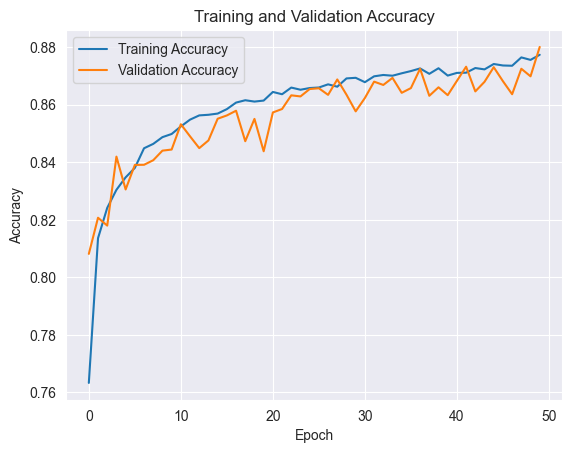

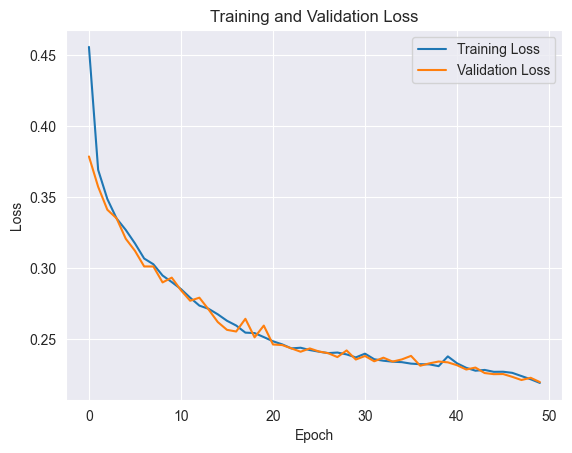

573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8806 - loss: 0.2184
Test Accuracy: 0.8800218105316162
Test Loss: 0.21944788098335266


In [60]:
#70 30 ration
x_tr, x_ts, y_tr, y_ts = train_test_split(data[labels], y, test_size=0.3, random_state=42)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to create CNN model
def create_cnn_model(input_shape, num_filters=64, kernel_size=3, pool_size=2, dense_units=128, dropout_rate=0.5):
    model = Sequential()
    model.add(Conv1D(num_filters, kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size))
    model.add(Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Prepare data
# Assuming you already have x_tr, x_ts, y_tr, and y_ts from your previous code

# Reshape input data to fit CNN input shape
x_tr_cnn = x_tr.values.reshape(x_tr.shape[0], len(labels), 1)
x_ts_cnn = x_ts.values.reshape(x_ts.shape[0], len(labels), 1)

# Scale input features
scaler = StandardScaler()
x_tr_scaled = scaler.fit_transform(x_tr_cnn.reshape(x_tr_cnn.shape[0], -1)).reshape(x_tr_cnn.shape)
x_ts_scaled = scaler.transform(x_ts_cnn.reshape(x_ts_cnn.shape[0], -1)).reshape(x_ts_cnn.shape)

# Create and compile the model
model = create_cnn_model(input_shape=(len(labels), 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_tr_scaled, y_tr, epochs=50, batch_size=256, validation_data=(x_ts_scaled, y_ts))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(x_ts_scaled, y_ts)
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')


573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


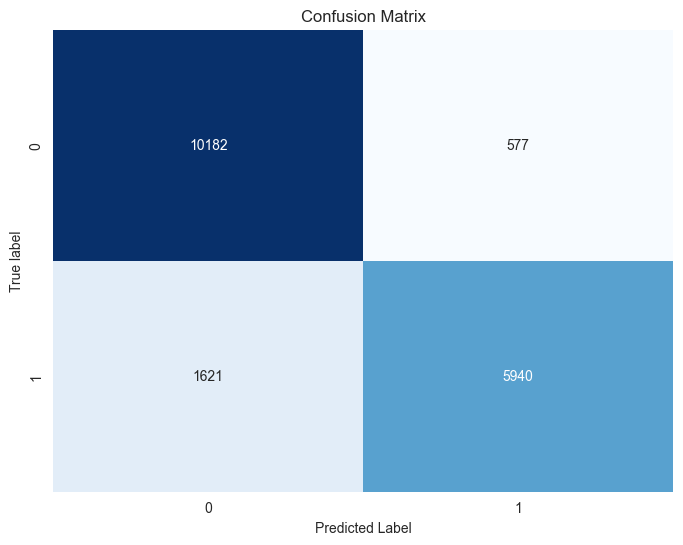

In [61]:
#import numpy as np
from sklearn.metrics import confusion_matrix

# Predict classes for test set
y_pred_probs = model.predict(x_ts_scaled)
y_pred_binary = (y_pred_probs>0.5).astype(int)

# Convert predictions and true labels to binary arrays
y_pred_binary = np.squeeze(y_pred_binary)
y_true_binary = np.squeeze(y_ts)

# Generate confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [62]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)
print(f'Precision: {precision}')
print(f'Recall: {recall}')  
print(f'F1 Score: {f1}')

Precision: 0.9114623292926193
Recall: 0.7856103689988096
F1 Score: 0.8438698678789601


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_true_binary, y_pred_binary))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     10759
           1       0.91      0.79      0.84      7561

    accuracy                           0.88     18320
   macro avg       0.89      0.87      0.87     18320
weighted avg       0.88      0.88      0.88     18320



Epoch 1/100


I:\WAF with mechine learning\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


179/179 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7346 - loss: 0.5175 - val_accuracy: 0.8099 - val_loss: 0.3721
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8100 - loss: 0.3674 - val_accuracy: 0.8165 - val_loss: 0.3562
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8212 - loss: 0.3533 - val_accuracy: 0.8221 - val_loss: 0.3380
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8264 - loss: 0.3364 - val_accuracy: 0.8161 - val_loss: 0.3408
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8338 - loss: 0.3264 - val_accuracy: 0.8358 - val_loss: 0.3160
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8372 - loss: 0.3161 - val_accuracy: 0.8477 - val_loss: 0.3087
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8404 - loss: 0.3072 - val_accuracy: 0.8517 - val_loss: 0.2958
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8453 - loss: 0.2962 - val_accuracy: 0.8351

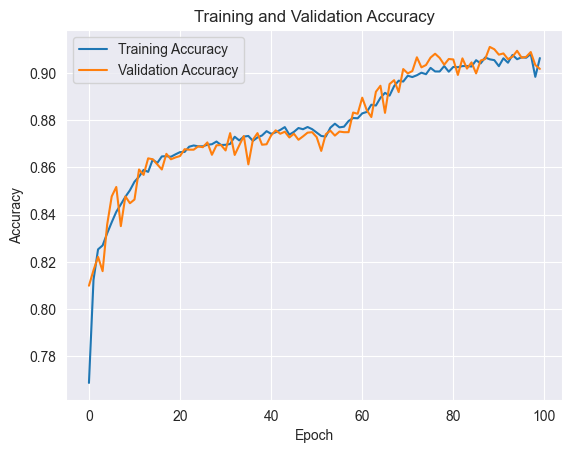

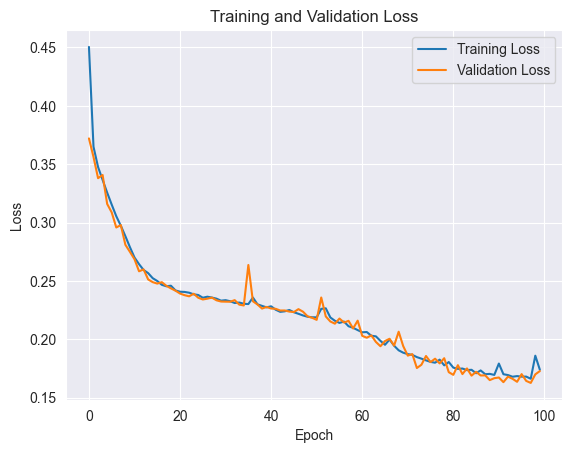

478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9023 - loss: 0.1708
Test Accuracy: 0.9016833901405334
Test Loss: 0.17279638350009918


In [49]:
#75:25
x_tr, x_ts, y_tr, y_ts = train_test_split(data[labels], y, test_size=0.25, random_state=42)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to create CNN model
def create_cnn_model(input_shape, num_filters=64, kernel_size=3, pool_size=2, dense_units=128, dropout_rate=0.5):
    model = Sequential()
    model.add(Conv1D(num_filters, kernel_size, activation='relu', input_shape=input_shape))
    model.add(MaxPooling1D(pool_size))
    model.add(Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size))
    model.add(Flatten())
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Prepare data
# Assuming you already have x_tr, x_ts, y_tr, and y_ts from your previous code

# Reshape input data to fit CNN input shape
x_tr_cnn = x_tr.values.reshape(x_tr.shape[0], len(labels), 1)
x_ts_cnn = x_ts.values.reshape(x_ts.shape[0], len(labels), 1)

# Scale input features
scaler = StandardScaler()
x_tr_scaled = scaler.fit_transform(x_tr_cnn.reshape(x_tr_cnn.shape[0], -1)).reshape(x_tr_cnn.shape)
x_ts_scaled = scaler.transform(x_ts_cnn.reshape(x_ts_cnn.shape[0], -1)).reshape(x_ts_cnn.shape)

# Create and compile the model
model = create_cnn_model(input_shape=(len(labels), 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_tr_scaled, y_tr, epochs=100, batch_size=256, validation_data=(x_ts_scaled, y_ts))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(x_ts_scaled, y_ts)
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')


478/478 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


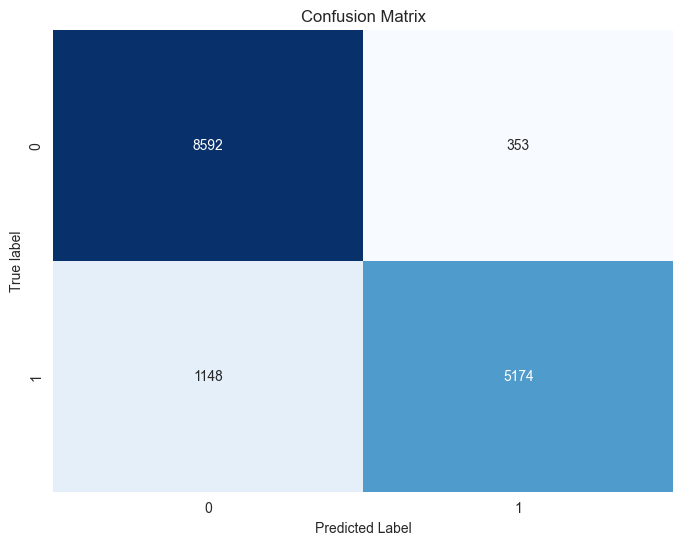

In [50]:
#import numpy as np
from sklearn.metrics import confusion_matrix

# Predict classes for test set
y_pred_probs = model.predict(x_ts_scaled)
y_pred_binary = (y_pred_probs>0.5).astype(int)

# Convert predictions and true labels to binary arrays
y_pred_binary = np.squeeze(y_pred_binary)
y_true_binary = np.squeeze(y_ts)

# Generate confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()


In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)
print(f'Precision: {precision}')
print(f'Recall: {recall}')  
print(f'F1 Score: {f1}')


Precision: 0.9361317170255111
Recall: 0.8184118949699463
F1 Score: 0.8733226432610347


In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_true_binary, y_pred_binary))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      8945
           1       0.94      0.82      0.87      6322

    accuracy                           0.90     15267
   macro avg       0.91      0.89      0.90     15267
weighted avg       0.90      0.90      0.90     15267



CNN-GRU Model

Epoch 1/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7230 - loss: 0.5481 - val_accuracy: 0.7887 - val_loss: 0.4076
Epoch 2/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7981 - loss: 0.3805 - val_accuracy: 0.8051 - val_loss: 0.3665
Epoch 3/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8146 - loss: 0.3567 - val_accuracy: 0.8240 - val_loss: 0.3452
Epoch 4/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8178 - loss: 0.3474 - val_accuracy: 0.8129 - val_loss: 0.3476
Epoch 5/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8246 - loss: 0.3382 - val_accuracy: 0.8254 - val_loss: 0.3283
Epoch 6/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8302 - loss: 0.3269 - val_accuracy: 0.8326 - val_loss: 0.3201
Epoch 7/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8326 - loss: 0.3185 - val_accuracy: 0.8424 - val_loss: 0.3206
Epoch 8/50
191/191 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8331 - loss: 0.3191 - val_accurac

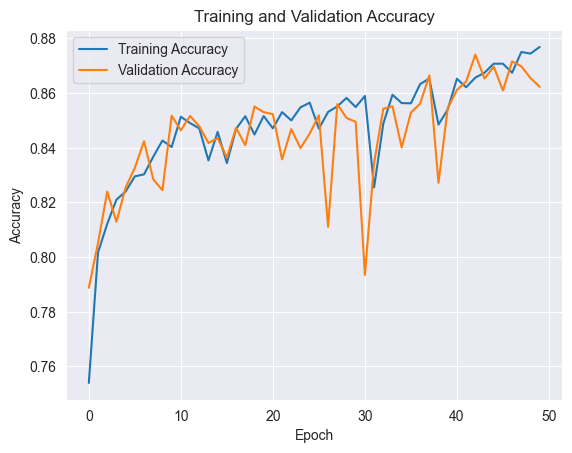

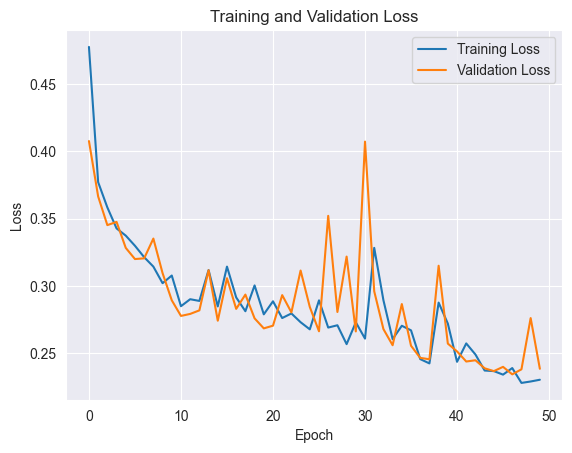

382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8620 - loss: 0.2344
Test Accuracy: 0.8622779250144958
Test Loss: 0.23861001431941986


In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, GRU, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Function to create CNN-GRU model
def create_cnn_gru_model(input_shape, num_filters=64, kernel_size=3, pool_size=2, gru_units=64, dense_units=128, dropout_rate=0.5):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size))
    model.add(Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size))
    model.add(GRU(gru_units))
    model.add(Dense(dense_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Prepare data
# Assuming you already have x_tr, x_ts, y_tr, and y_ts from your previous code

# Reshape input data to fit CNN input shape
x_tr_cnn = x_tr.values.reshape(x_tr.shape[0], len(labels), 1)
x_ts_cnn = x_ts.values.reshape(x_ts.shape[0], len(labels), 1)

# Scale input features
scaler = StandardScaler()
x_tr_scaled = scaler.fit_transform(x_tr_cnn.reshape(x_tr_cnn.shape[0], -1)).reshape(x_tr_cnn.shape)
x_ts_scaled_gru = scaler.transform(x_ts_cnn.reshape(x_ts_cnn.shape[0], -1)).reshape(x_ts_cnn.shape)

# Create and compile the model
model = create_cnn_gru_model(input_shape=(len(labels), 1))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_tr_scaled, y_tr, epochs=50, batch_size=256, validation_data=(x_ts_scaled, y_ts))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(x_ts_scaled, y_ts)
print(f'Test Accuracy: {accuracy}')
print(f'Test Loss: {loss}')


382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


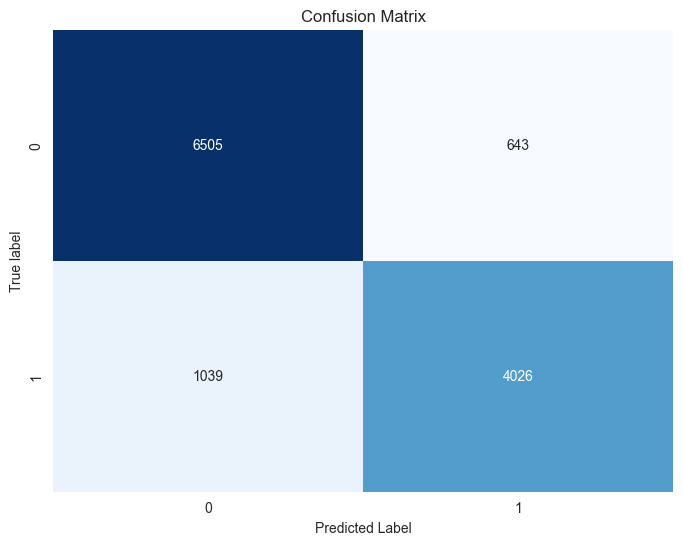

In [38]:
#import numpy as np
from sklearn.metrics import confusion_matrix

# Predict classes for test set
y_pred_probs = model.predict(x_ts_scaled_gru)
y_pred_binary = (y_pred_probs>0.5).astype(int)

# Convert predictions and true labels to binary arrays
y_pred_binary = np.squeeze(y_pred_binary)
y_true_binary = np.squeeze(y_ts)

# Generate confusion matrix
cm = confusion_matrix(y_true_binary, y_pred_binary)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_true_binary, y_pred_binary)
recall = recall_score(y_true_binary, y_pred_binary)
f1 = f1_score(y_true_binary, y_pred_binary)
print(f'Precision: {precision}')
print(f'Recall: {recall}')  
print(f'F1 Score: {f1}')

Precision: 0.8622831441422146
Recall: 0.7948667324777887
F1 Score: 0.8272036161906718


In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_true_binary, y_pred_binary))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      7148
           1       0.86      0.79      0.83      5065

    accuracy                           0.86     12213
   macro avg       0.86      0.85      0.86     12213
weighted avg       0.86      0.86      0.86     12213

